In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as tsa
import statsmodels.tsa.arima_process as arima_process
import statsmodels.graphics.tsaplots as tsaplots

import warnings

warnings.filterwarnings("ignore")

### Create an autoregressive moving average (ARMA) process

In [56]:
process = arima_process.ArmaProcess(ar=[1,-0.8], ma=[1])

In [57]:
# the size or the number of datapoints
z = process.generate_sample(nsample=100)

In [58]:
z

array([ 0.10159737,  0.75803367, -0.42696457,  0.97540476,  0.1542039 ,
        2.14268446,  4.15892705,  5.93670354,  5.59504291,  4.71601056,
        4.63513218,  5.47945695,  5.07454367,  4.93116602,  4.66802692,
        4.31093192,  2.67015714,  2.10942354,  1.85292163,  0.22503749,
        0.00830153, -0.9054944 , -3.51606965, -2.61536441, -2.68479445,
       -3.68912761, -3.74737018, -2.29233719, -1.5866678 ,  0.57692781,
        1.06128198,  0.72443699,  0.41140783, -0.90450459, -0.22031917,
        0.82875724,  0.63929632,  0.1457711 ,  0.51231121, -1.01082799,
       -0.09359523, -1.23912493, -1.83258695, -2.74999792, -1.306308  ,
       -1.59388488,  0.29332911,  1.41176396, -0.68686835, -0.4545055 ,
       -0.03321059, -0.13471699, -0.37052663, -0.49173363, -1.50763917,
        0.81943348,  0.89811804,  2.98428741,  2.05574085,  0.11592235,
       -0.25666602, -1.22189685, -1.25802578, -1.08236016, -0.57838063,
       -1.63520913, -1.11977489,  0.15005066, -1.6304137 , -2.34

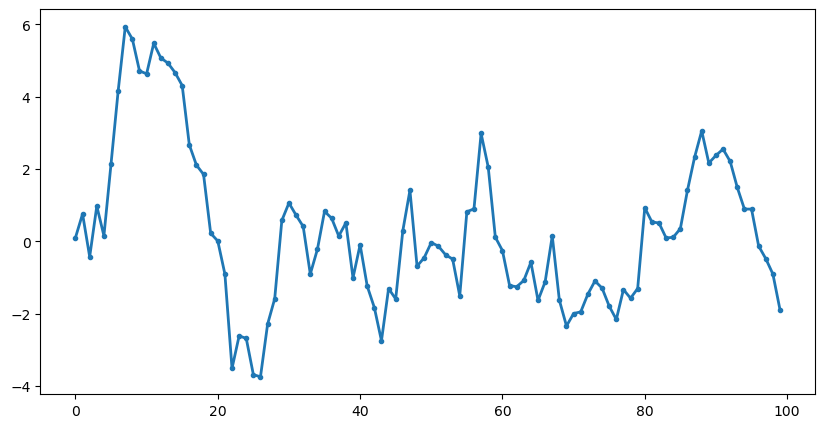

In [59]:
plt.figure(figsize=(10,5)) 
plt.plot(z, linewidth=2,marker='.')

### Autocorrelations

In [60]:
# the number of lags or the number of coefficients (20)
acf = process.acf(lags=20)

In [61]:
acf

array([1.        , 0.8       , 0.64      , 0.512     , 0.4096    ,
       0.32768   , 0.262144  , 0.2097152 , 0.16777216, 0.13421773,
       0.10737418, 0.08589935, 0.06871948, 0.05497558, 0.04398047,
       0.03518437, 0.0281475 , 0.022518  , 0.0180144 , 0.01441152])

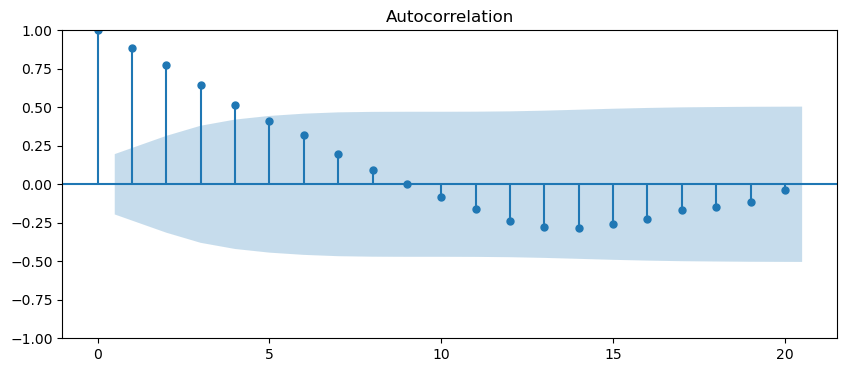

In [62]:
fig, ax = plt.subplots(figsize=(10,4)) 
tsaplots.plot_acf(z, lags=20, ax=ax) 
plt.show()

In [63]:
sunspots = pd.read_csv('data/Sunspots.csv') 
sunspots.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [64]:

# convert dates into a timestamp object
pd.to_datetime(sunspots.loc[0, 'Date'])

Timestamp('1749-01-31 00:00:00')

In [65]:
sunspots = sunspots.set_index(pd.to_datetime(sunspots['Date']))

In [66]:
# drop the first column, we need only two columns for creating a Time Series
sunspots.drop(columns=['Unnamed: 0', 'Date'], inplace=True)

In [67]:
sunspots.columns

Index(['Monthly Mean Total Sunspot Number'], dtype='object')

In [68]:
sunspots

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0


In [69]:
sunspots.rename(columns={'Monthly Mean Total Sunspot Number':'values'}, inplace=True)

In [70]:
sunspots

,values
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0


<Axes: xlabel='Date'>

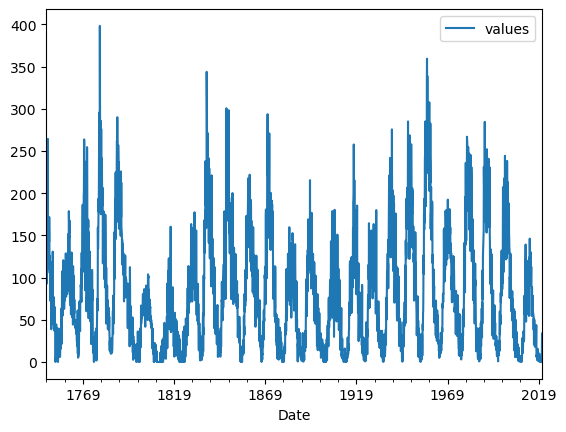

In [71]:
sunspots.plot()

### Although the sunspots data is not stationary, the difference of sunspots from one month to the next is believed to be stationary
### For the data to be stationary, the autocorrelations should decay to zero.
Stationary processes are more difficult to predict than non-stationary processes since they lack a trend, seasonality, or cycles.
However, stationary processes may still contain structure in the form of the autocorrelation function, which can be estimated and used to make short-term predictions.

- None stationary data

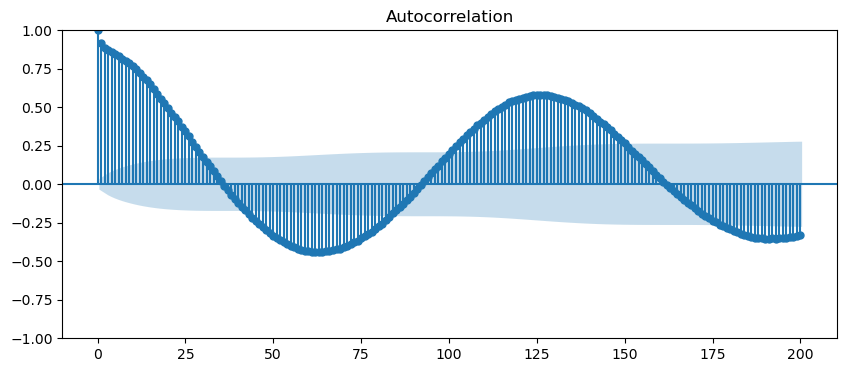

In [72]:
fig, ax = plt.subplots(figsize=(10,4)) 
tsa.plot_acf(sunspots, lags=200, ax=ax) 
plt.show()

- Stationary data

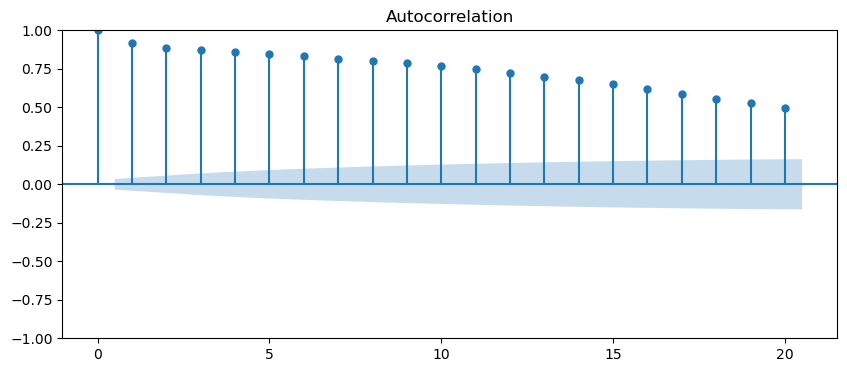

In [75]:
fig, ax = plt.subplots(figsize=(10,4))
tsaplots.plot_acf(sunspots, lags=20, ax=ax)
plt.show()

### Take a difference
The sun dataset is not stationary, 
but the data between the months it is stationary

In [82]:
diff_sunspots=sunspots.diff().dropna()

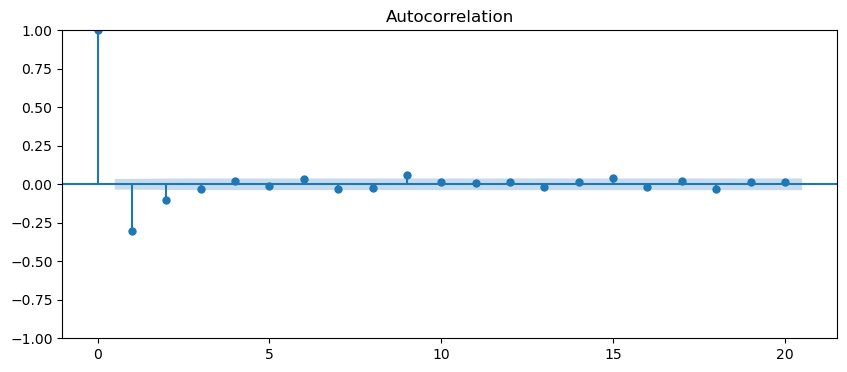

In [85]:
# Wow, this is not decaying at all, it behaves sort of sinusoidally and even after 200 lags is not seeming to decay.
# So this is a very good indication that the sunspots data is not stationary, which is something that we already knew.
fig, ax = plt.subplots(figsize=(10,4))
tsaplots.plot_acf(diff_sunspots, lags=20, ax=ax)
plt.show()

# y=t+c+s+r
▪ Trend (t): Long-term behavior
▪ Cycles (c): Variations that break with the trend, but do not happen with a set period i.e. random low-frequency variations
▪ Seasonality (s): Known periodic behavior
▪ Residue (r): Any other behavior